In [126]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates
from scipy.io import savemat,loadmat

In [127]:
from stemsegmentation import segmentationSTEM

In [92]:
#video = np.load('../data/video_experiment.npy') # the sparse video
video = np.load('/u/wangnisn/devel/data/insitu_HEA_WenJun/last641.npy')
video = np.squeeze(video)

In [93]:
video.shape

(641, 1024, 1024)

In [95]:
video = video - np.mean(video)
video = video / np.std(video)

In [96]:
video = video[:,(1024-424):,(1024-224):]

In [97]:
video.shape

(641, 424, 224)

In [98]:
video[0,:,:]

array([[-0.83614158, -0.61883605, -0.26324518, ..., -0.57932596,
        -1.40903798, -1.2114875 ],
       [-0.97442692, -0.52006081, -0.44104062, ...,  0.40842646,
        -0.55957091, -0.599081  ],
       [ 0.17136588,  0.70475218, -0.14471489, ...,  0.4676916 ,
         0.23063102, -0.0261846 ],
       ...,
       [-0.99418197, -1.2509976 , -0.53981586, ..., -0.44104062,
        -0.99418197, -0.91516178],
       [ 0.34916131,  0.09234569,  0.25038607, ..., -0.89540673,
        -1.23124255, -1.13246731],
       [ 1.57397431,  0.80352742,  0.78377238, ..., -0.75712139,
        -0.79663149, -0.89540673]])

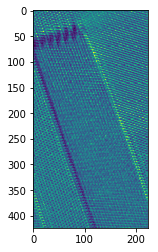

In [99]:
plt.imshow(video[0,:,:])

In [100]:
seg = segmentationSTEM(n_patterns=2,window_x=15,window_y=15,step=3,max_num_points=500,descriptor_name='power_spectrum',
                      power_spectrum_logarithm=True,soft_segmentation=True)

In [101]:
labels = seg.perform_clustering(video[0])

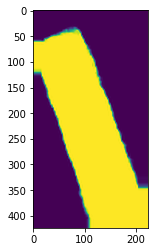

In [102]:
plt.imshow(labels)

In [103]:
pca_fitted = seg._pca
kmeans_init_centers = seg._kmeans.cluster_centers_

In [104]:
pca_fitted

PCA(n_components=5)

In [107]:
seg = segmentationSTEM(n_patterns=2,window_x=15,window_y=15,step=3,max_num_points=500,descriptor_name='power_spectrum',
                       pca_fitted=pca_fitted,kmeans_init_centers=kmeans_init_centers,one_step_kmeans=True,soft_segmentation=True)

In [108]:
labels = np.zeros_like(video)

In [ ]:
shape = video.shape
for i in np.arange(len(video)):
    labels[i] = seg.perform_clustering(video[i])

/u/wangnisn/.local/lib/python3.7/site-packages/pystem-0.0.13-py3.7-linux-x86_64.egg/stemsegmentation.py:190: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  kmeans.fit(np.reshape(features,(-1,shape[2])))
/u/wangnisn/.local/lib/python3.7/site-packages/pystem-0.0.13-py3.7-linux-x86_64.egg/stemsegmentation.py:190: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  kmeans.fit(np.reshape(features,(-1,shape[2])))
/u/wangnisn/.local/lib/python3.7/site-packages/pystem-0.0.13-py3.7-linux-x86_64.egg/stemsegmentation.py:190: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  kmeans.fit(np.reshape(features,(-1,shape[2])))
/u/wangnisn/.local/lib/python3.7/site-packages/pystem-0.0.13-py3.7-linux-x86_64.egg/stemsegmentation.py:190: RuntimeWarning: Explicit initial center position passed: performing only on

In [ ]:
labels.shape

In [ ]:
plt.imshow(labels[0])

In [ ]:
np.save('../data/phase_field_twoD_last641.npy', labels)

In [ ]:
line_start = np.array([0,0])
line_end = np.array([423,145])
num_points = 500

x_coords = np.linspace(line_start[0],line_end[0], num=num_points, endpoint=True)
y_coords = np.linspace(line_start[1],line_end[1], num=num_points, endpoint=True) 
coords = np.vstack((x_coords, y_coords))

distances = np.linalg.norm(coords - line_start[:,np.newaxis], axis=0)
zi = map_coordinates(labels[5], coords)

In [ ]:
plt.plot(distances[80:120], zi[80:120])
plt.title('Phase field at the interface')

In [ ]:
plt.plot(distances[80:90], zi[80:90])
plt.title('Phase field at the interface')

In [ ]:
apply_filtering = False

In [ ]:
if apply_filtering is True:
    from scipy.signal import savgol_filter
    filtered = savgol_filter(zi, 11,1)
    plt.plot(distances[80:120], filtered[80:120])
    plt.title('Phase field at the interface')

In [ ]:
phase_fields = np.zeros( (len(labels),len(distances)))

In [ ]:
for i in range(len(labels)):
    phase_fields[i] = map_coordinates(labels[i], coords)
    if apply_filtering is True:
        phase_fields[i] = savgol_filter(phase_fields[i], 11,1)

Text(0, 0.5, 'Phase field')

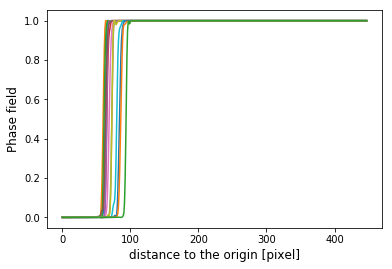

In [140]:
plt.plot(distances, phase_fields[0])
plt.plot(distances, phase_fields[5])
plt.plot(distances, phase_fields[10])
plt.plot(distances, phase_fields[15])
plt.plot(distances, phase_fields[20])
plt.plot(distances, phase_fields[25])
plt.plot(distances, phase_fields[30])
plt.plot(distances, phase_fields[35])
plt.plot(distances, phase_fields[40])
plt.plot(distances, phase_fields[45])
plt.plot(distances, phase_fields[50])
plt.plot(distances, phase_fields[55])
plt.plot(distances, phase_fields[60])
plt.xlabel('distance to the origin [pixel]',fontsize=12)
plt.ylabel('Phase field',fontsize=12)

In [147]:
phase_fields.shape

(641, 500)

In [148]:
phase_fields = np.swapaxes(phase_fields, 0,1)

In [149]:
shape = phase_fields.shape

In [150]:
delta_t_frame = 1.       # use the two parameters encode the physical time and space
delta_x = 1.             # 

In [151]:
time = np.arange(shape[1])*delta_t_frame

In [152]:
x = distances * delta_x

In [153]:
x = np.expand_dims(x,0)
time = np.expand_dims(time,1)

In [154]:
savemat('../data/phase_field_oneD_last641.mat', {'t':time, 'x':x, 'usol':phase_fields})

In [158]:
data = loadmat('../data/phase_field_oneD_last641.mat')

In [159]:
phase_fields = data['usol']

In [163]:
from scipy.signal import savgol_filter
phase_fields_filtered = np.zeros_like(phase_fields)
shape = phase_fields.shape
for i in range(shape[1]):
    phase_fields_filtered[:,i] = savgol_filter(phase_fields[:,i], 11,2)
for i in range(shape[0]):
    phase_fields_filtered[i,:] = savgol_filter(phase_fields_filtered[i,:], 11,2)

In [164]:
savemat('../data/phase_field_oneD_last641_filtered.mat', {'t':data['t'], 'x':data['x'], 'usol':phase_fields_filtered})